# Resultados y experimentos

En este notebook mostraremos algunos resultados estadísticos de la simulación.

En nuestra simulación de inventario hemos considerado que los elementos más importantes a analizar desde un punto de vista estadístico, son las perdidas totales y como terminó el balance de la tienda al finalizar la sección de trabajo de la misma. Nosotros asumimos que la tienda trabaja cada día por 14 horas

Para comenzar a realizar los análisis creamos una simulación con los siguientes parámetros:
- Tiempo total de la simulación $\to$ $14 \cdot 60 = 840$ (en minutos)
- La política de pedido $(s,S)$ $\to$ $(20,300)$
- El precio del producto $\to$ 10
- El tiempo que se demora en llegar el suministro del proveedor $\to$ 10 min
- La constante de costo por el pago de mantener el inventario $\to$ 3
- El tiempo entre pagos por mantener el inventario $\to$ 60 min
- El costo por ordenar $y$ unidades de producto al proveedor es $\to$ $5 \cdot y$
- El inventario inicial $\to$ 0
- El tiempo de llegada entre clientes está dada por la distribución *Poisson* con $\lambda = 5$
- La distribución que representa cuantas unidades pedirá el cliente, distribuye *Uniforme* entre $(1,50)$


In [1]:
from simulation_engine import *

# simulation_time:int = 14 * 60 # 14 hours * 60 min = 840
simulation_time:int = 840
product_price = 10
initial_policy = (20, 300)

# The simulation time is in minutes
sim = InventorySimulation(sim_duration=simulation_time, s=initial_policy[0], S= initial_policy[1], initial_inventory_level= 100, product_value=product_price)
sim.run()

## Análisis inicial de la simulación

El siguiente código muestra como salida los siguientes gráficos del comportamiento de la tienda a lo largo de la simulación:
- Gráfico de las ventas $\to$ Muestra la cantidad de unidades vendidas
- Gráfico de balance $\to$ Muestra como se comportó el balance de la cuenta de la tienda a lo largo de la simulación.
- Gráfico de perdidas $\to$ Muestra el dinero que se perdió por productos que no se pudieron vender debido a falta de inventario.
- Gráfico del pago por el servicio del inventario $\to$ Muestra cuanto la tienda pagó por mantener el inventario.
- Gráfico del pago por el servicio de suministro del proveedor $\to$ Muestra cuanto pagó la tienda por el servicio de suministro y en que momento ocurrió.


In [2]:
from sim_stats import SimStatistics
from graphics import Graphics

sim_statistics = SimStatistics(sim)
graph = Graphics(sim_statistics)

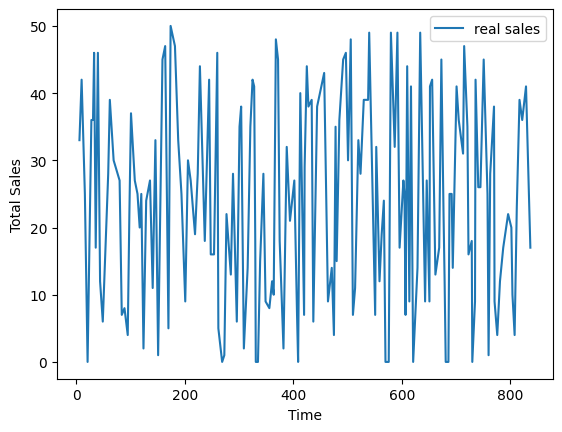

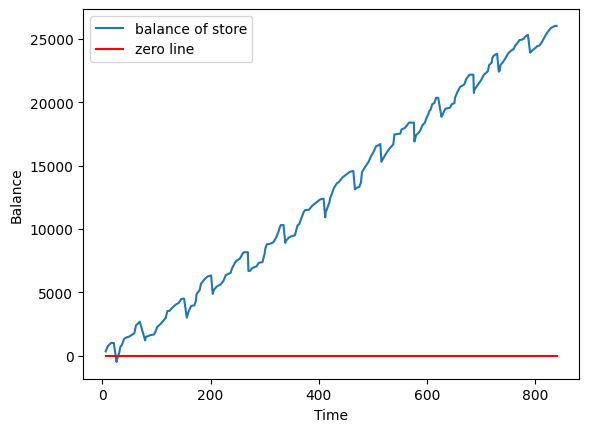

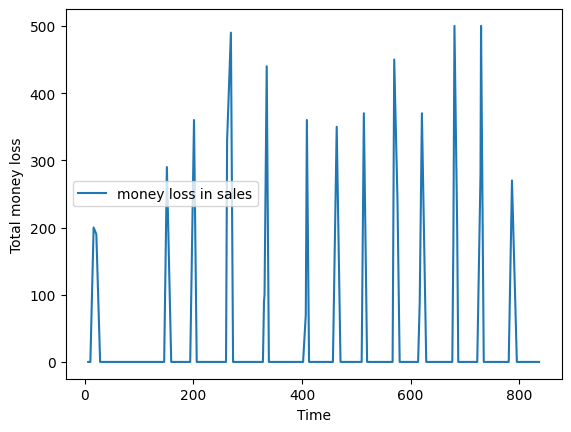

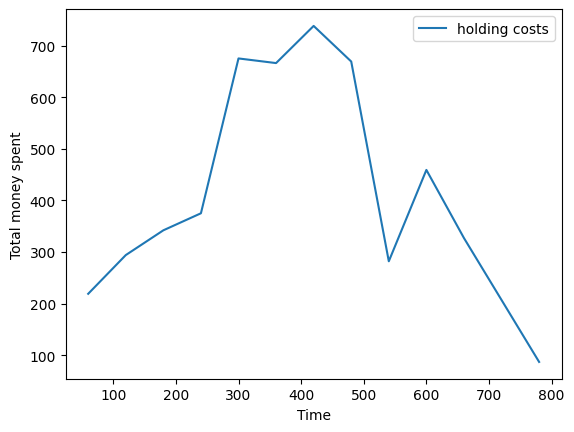

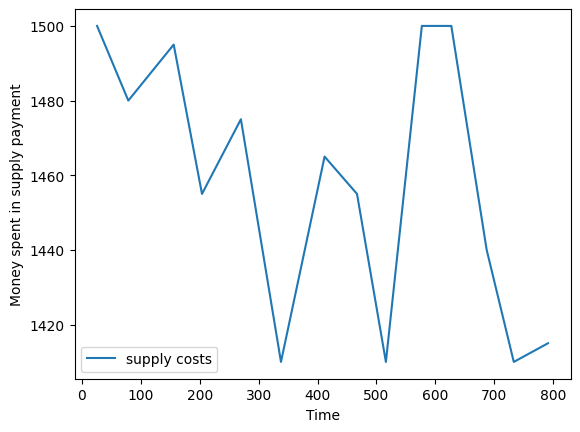

In [3]:
graph.plot_sells()
graph.plot_balance()
graph.plot_loss(product_price=product_price)
graph.plot_inventory_holding_cost()
graph.plot_supply_costs()

## Resultados de varias corridas

En la sección anterior se mostró una simple corrida de la simulación y se mostraron los gráficos de sus ventas y perdidas.

En esta sección se realizarán varias corridas de la simulación para analizar su comportamiento general, para esto se calculará la:
- *Esperanza*
- *Varianza*
- *Desviación Estándar*

De las *perdidas* de ventas por parte de la tienda, de los *costos* que se tienen que pagar por mantener el inventario y por pedir nuevos suministros al proveedor, y del *balance*.

**Nota**: Este análisis se realiza con 40 corridas de la simulación.


In [4]:
results = sim_statistics.calculate_statistics_results()

In [5]:
from math import sqrt

print(f'El valor que se espera de perdidas de ventas es: {results.loss_expectation}')
print(f'El valor que se espera en costos es: {results.costs_expectation}')
print(f'El balance final de la tienda que se espera en promedio es: {results.final_balance_expectation}')

# Desviación estándar
print('\n------------------------ Desviación estándar ------------------\n')

print(f'La desviación estándar de las perdidas de ventas es: {sqrt(results.loss_variance)}')
print(f'La desviación estándar de los costos es: {sqrt(results.costs_variance)}')
print(f'La desviación estándar del balance es: {sqrt(results.final_balance_variance)}')

El valor que se espera de perdidas de ventas es: 4481.5
El valor que se espera en costos es: 24555.075
El balance final de la tienda que se espera en promedio es: 24430.075

------------------------ Desviación estándar ------------------

La desviación estándar de las perdidas de ventas es: 921.3800964049973
La desviación estándar de los costos es: 1448.285961058796
La desviación estándar del balance es: 1608.3213639118846


## Optimización de la simulación

Ahora sobre la simulación anterior realizaremos una optimización sobre la política $(s,S)$ usando un algoritmo de búsqueda local y analizaremos que tanto se pueden mejorar los resultados anteriores.

La función que usaremos para evaluar que tan buena es la simulación es la siguiente:
$$
loss + 2\cdot costs - 3\cdot balance
$$

donde:
- **loss** es la perdida de ventas promedio
- **costs** es el total de costos promedio
- **balance** es el balance final promedio


In [6]:
from optimizer import OptimizeSimulation

max_value_in_policy = 300 # Esto representa el valor máximo que puede tener la variable S

fitness = lambda stats: stats.loss_expectation + 2 * stats.costs_expectation - 3 * stats.final_balance_expectation


new_sim = InventorySimulation(sim_duration=simulation_time, s=initial_policy[0], S= initial_policy[1], initial_inventory_level= 100, product_value=product_price)
opt = OptimizeSimulation(new_sim, initial_policy=initial_policy, runs=30, max_value=max_value_in_policy)

res = opt.optimize(steps_search=20, single_point=False)


In [7]:
print(f'La política que se ha encontrado más óptima es {res}')

La política que se ha encontrado más óptima es (130, 278)


In [8]:
from graphics import Graphics

sim_statistics = SimStatistics(new_sim)
graph = Graphics(sim_statistics)


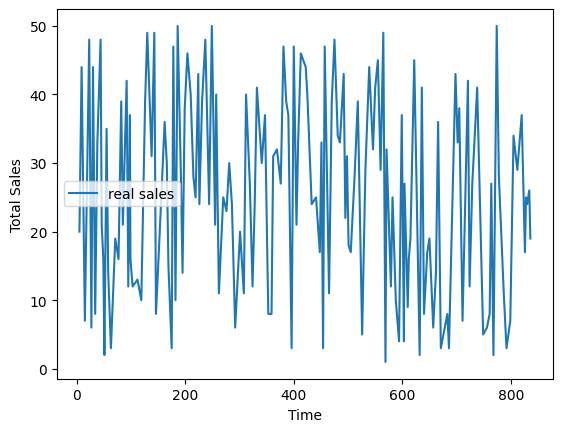

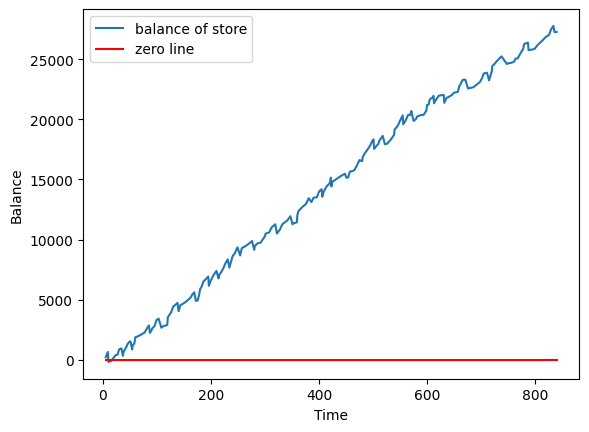

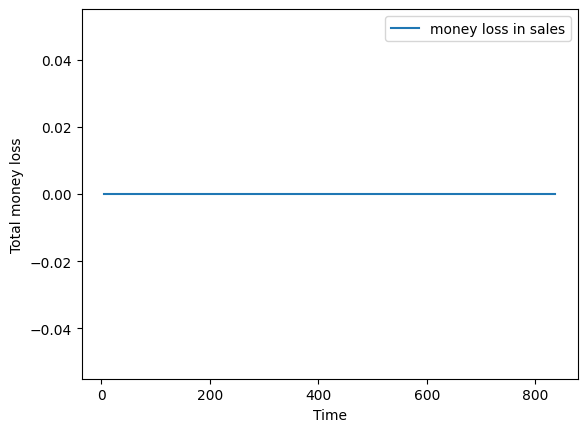

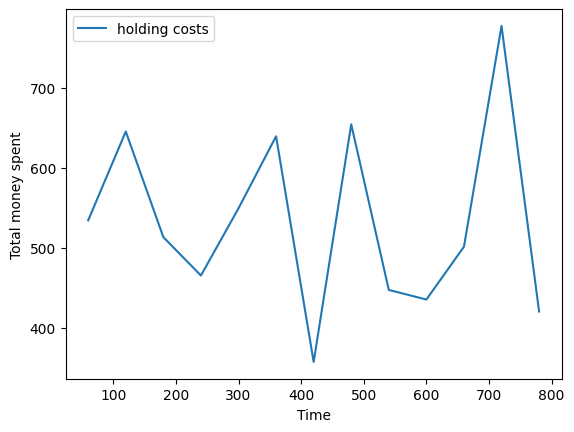

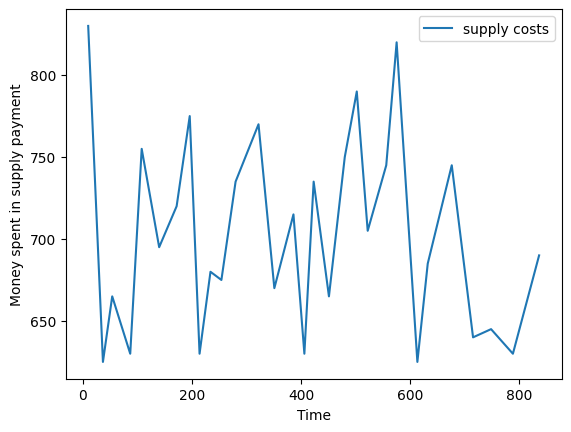

In [9]:
graph.plot_sells()
graph.plot_balance()
graph.plot_loss(product_price)
graph.plot_inventory_holding_cost()
graph.plot_supply_costs()

### Analicemos que tanto mejoraron las estadísticas

Volvamos a calcular las estadísticas de la simulación anterior usando la política de la nueva simulación.

In [10]:
optimal_results = sim_statistics.calculate_statistics_results()

In [11]:
from math import sqrt

print(f'El valor que se espera de perdidas de ventas es: {optimal_results.loss_expectation}')
print(f'El valor que se espera en costos es: {optimal_results.costs_expectation}')
print(f'El balance final de la tienda que se espera en promedio es: {optimal_results.final_balance_expectation}')

# Desviación estándar
print('\n------------------------ Desviación estándar ------------------\n')

print(f'La desviación estándar de las perdidas de ventas es: {sqrt(optimal_results.loss_variance)}')
print(f'La desviación estándar de los costos es: {sqrt(optimal_results.costs_variance)}')
print(f'La desviación estándar del balance es: {sqrt(optimal_results.final_balance_variance)}')

El valor que se espera de perdidas de ventas es: 17.5
El valor que se espera en costos es: 27842.625
El balance final de la tienda que se espera en promedio es: 27318.125

------------------------ Desviación estándar ------------------

La desviación estándar de las perdidas de ventas es: 74.89308618940976
La desviación estándar de los costos es: 1181.171120009116
La desviación estándar del balance es: 1140.1589899816154


## Resultados

Los resultados anteriores muestran como la optimización permitió en efecto optimizar el resultado estadístico de la simulación, reduciendo los costes, las perdidas y aumentando el balance final.